# Character based cipher
Last update: 25 Jan 2020  
change name to Character based cipher  

## Abstract
This paper documents an educational project that implements a cipher based on a two round Feistel structure and operates on characters instead of bits.  The character set is the English alphabet consisting of 26 letters, A to Z; all other characters and spaces are removed before processing.      

## 1) Introduction
The purpose of the paper is to document a coding project that implements a character based encryption scheme.  This is an educational project for exploring aspects of the Feistel structure.  The code developed here is not intended to implement a secure encryption scheme, only to explore and document some interesting aspects of encryption.  The code will take as plain text input, blocks of text consisting of characters A to Z, and output ciphertext blocks, also consisting of characters A to Z.  The code will strip any non-alpha characters from the input text before encipherment.  

Encryption is the process of encoding information so that converts the original of the information, known as plaintext into into an alternative form known as ciphertext.  The ciphertext is what is transmitted to prevent third parties or the public from reading private messages [1].  

In December 2020, the Zodiac cipher, Z340, was solved after more than 51 years and a very interesting YouTube video on the solution was published [2].  The solution to solving the cypher was a combination of brute force and hill climbing.  The cypher was meant to be eventually decoded, otherwise why would the Zodiac send it?  But the cypher turned out to be very difficult and the solution involved lots of computer time employing random trials.  As bits of the message were uncovered, these were used as clues to help solve the remaining message.  

Zodiac’s first cypher was solved on August 8, 1969, by Donald and Betty Harden of Salinas, California. David Oranchak has a very interesting video on the history and solution of this cipher [3]. The first cipher, given the name, Z408, since there were 408 characters in the message.  The cipher was divided into three parts and each part wassent to a different news papers.  Each part of the cipher had 17 columns and 8 rows of symbols for a total of 408 symbols.  54 different symboles were used in the message.  The key for the solved cipher had some letters encoded by different symbols, which is called subsitution with suppression of frequencies.  Since individual letter frequencies were supressed, Donald and Betty focused on double symbols in the cipher and they look for a four letter pattern that would fit the word KILL.  Eventyually they solved the Z340 cipher and sent their solution into the news paper, who passed the solution onto the police.
  
<img src='Z408 hand drawn.jpg' width="400"/>   
Figure 1: The solution key to the Z408 cipher.  

The second cypher, Z340, was 340 symbols long with 63 different symbols.  Both the Z408 and the Z340 ciphers were extinsivally studied with the thought that some clues from the Z408 solution could be used to solve the Z340 cipher.  Eventually, by trial and error, it was suspected that the symbols in the Z340 cipher might be interleaved somehow. David Oranchak's video on the Z340 describes the solution to the cipher.     
  
<img src='Z340 hand drawn.jpg' width="400"/>  
Figure 2: The solution key to the Z340 cipher.   

The Zodiac wanted the Z340 to be harder to decode, but did he suspect that it would remain unread for so long?  

There are other well know examples of ciphers that operate on characters.  The Playfair[4] and the German Enigma[5] are examples of character based cyphers.  These ciphers were used prior to the modern computer era.  

The Playfair cipher is encrypts pairs of letters and is harder to break than simple substitution ciphers.  This is because frequency analysis does not work with this cipher.  Breaking the cipher by hand required a lot of work, however, by using modern computers and using a shotgun hill climbing method, the cipher can be broken quickely.  

The German Enigma is a cipher that uses a typewriter based machine to encode and decode the messages.  Each press of the keyboard causes the machine state to advance and implement a polyalphabetic substitution cipher.  Polish, British and eventually Americam criptogeraphers spent concerderable effort during World War II to break the German Enigma.   

Watching David Oranchak's video on the solution of the Z340 got me interested in looking at cyphers.  In this programming project, we are not going to invent a new cipher.  We are going to use the well known Feistel network and use some ideas from the Data Encryption Standard [6][7] that operates on characters as opposed to binary data.  

The goal of this programming project is to design a character based cipher based on two rounds of a Feistel network.  It would not be secure by present day standards.  A cryptogram is a type of puzzle that consists of a short piece of encrypted text.  The cipher presented in this project could be used to generate cryptograms, however, I think such a cryptogram would be almost impossible to break by hand.  Later I will present an analysis of the cipher and some comments on attacking it.    

The Feistel network is a data flow map which can be used to construct a block cipher[8].  The cipher structer is named after the German-born physicist and cryptographer Horst Feistel who did pioneering research while working for IBM and several well known ciphers use the Feistel network.  In most implementations binary data is processed as bits, but in this project, characters will be processed as the unit8 type data.  The Figure 3, below shows the Feistel network.

<img src='Feistel network.jpg' width="400"/>  
Figure 3: Feistel cipher diagram 

The input data is divided into blocks, which are divided into half blocks, Left and Right.  The Right half block is passed through the function F(), called the Feistel function, and then XOR'ed with the Left half block.  As shown Figure, there is an additional application of the XOR and F().  The Left and Right out puts when combined is the encrypted data block.  The Feistel network is invertible, even if the round function is not itself invertible.

**Scope**  
The cipher presented in this paper is not designed to be secure by modern standards.  The purpose of the project is to explore selected acpects of cryptography.  Cryptography is heavily based on mathematical theory and computer science practice, in this paper we will not be offering any mathamatic proofs.  A second goal of the project is to test the use JupyterLab as a medium to write a technical paper.

**Contents**  
2. [Preliminaries](#section2)
3. [Design](#section3)
4. [Test message](#section4)
5. [Algorithm analysis](#section5)
6. [Ciphertext attack](#section6)  
7. [Plaintext attack](#section7)   
8. [Conclusion](#section8)
9. [References](#section9)

The following python libraries are used in this project.   
- Collections: a python module that supplies different types of containers for access and iteration
- Counter: used to keep the count of the elements
- itertools: a python module that provids functions that work on iterators
- NumPy: a python library used for working with arrays
- Matplotlib: a library for creating graphs and plots  
- scipy.special import comb: calculates the number of combinations of N things taken k at a time. 
- from Crypto.Hash import SHA256: takes an arbitrary binary strings as input and produce a random-like fixed-length output (called digest or hash value)
- import random as rnd: this module implements pseudo-random number generators.  The secrets module should be used if actual cryptographic strength was needed, but not necessary for a study paper.
- pickle:

**Revisions**  
- 1/22/2021: Reorganized notebooks, now have notebooks for Algorithm analysis, CT attack, PT attack and N-gram analysis.  Files were getting big and some were taking too long to load.   

In [1]:
from collections import Counter
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from Crypto.Hash import SHA256
import random as rnd
import pickle
from scipy.stats import chisquare

## 2) Preliminaries <a id="section2"></a>
This section of the paper will cover some preliminary topics that are required for the operation of the cipher.  Since this paper also contain python code, there are variables, functions and data that need to be declared first.  These are describe in greater detail in the various subsections.  

The block size in this implementation is 16 characters long and the total character count is padded to bring the total length of the message to a multiple of the block size.  

- 2.a) [Test message](#section2a)
- 2.b) [Letter frequency](#section2b)
- 2.c) [Character encoding for processing](#section2c)  
- 2.d) [Key generation](#section2d)
- 2.e) [Character XOR](#section2e)
- 2.f) [Mixer matrix](#section2f)
- 2.g) [S-box](#section2g)
- 2.h) [P-table](#section2h)
- 2.i) [Feistel function](#section2i)


### 2.a) Test message <a id="section2a"></a>
The test message used for this project is the English translation of the first chapter from Julius Caesar's account of the Gallic Wars [9][10].  In Latin, it begins with "Gallia est omnis divisa in partes tres", meaning "All Gaul is divided into three parts".  After the text file is read into memory, all the non-letter characters (numbers, spaces and puncuation) are removed and all letters are converted to upper case.  Then the message is padded to make the length equal to an even multiple of the block length. The test message then consists of list of upper case letters without spaces between the words.

All the spaces and puctutation are removed to reduce the message to just the essential elements.  Upper case was used to make the message look more crypto like.  There is a sculpture located on the grounds of the Central Intelligence Agency (CIA) in Langley which has four encrypted messages, in all capital letters [11].       

Chapter 1 of Caesar's Gallic Wars was chosed as the test message in a nod to the cipher named after him.  A simple subsition cipher is sometimes called a Caesar cipher.  Each letter in the plaintext is replaced by a letter some fixed number of positions down the alphabet [12].

The following code reads in the test message and does the conversion and padding as described.

In [2]:
# open the test message
message = open('Commentarii_de_Bello_Gallico.txt', 'r').read()

In [3]:
# print the test message
string = message
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

All Gaul is divided into three parts, one of which the Belgae inhabit, the 
Aquitani another, those who in their own language are called Celts, in our 
Gauls, the third. All these differ from each other in language, customs and
 laws. The river Garonne separates the Gauls from the Aquitani; the Marne a
nd the Seine separate them from the Belgae. Of all these, the Belgae are th
e bravest, because they are furthest from the civilization and refinement o
f our Province, and merchants least frequently resort to them, and import t
hose things which tend to effeminate the mind; and they are the nearest to 
the Germans, who dwell beyond the Rhine, with whom they are continually wag
ing war; for which reason the Helvetii also surpass the rest of the Gauls i
n valor, as they contend with the Germans in almost daily battles, when the
y either repel them from their own territories, or themselves wage war on t
heir frontiers. One part of these, which it has been said that the Gauls oc
cupy, takes 

In [4]:
# remove non-letter characters and convert to upper case
PT = ''.join(e for e in message if e.isalpha()).upper()

In [5]:
# pad the message size to get to even multiple of the block size
block_size = 16  # must be an even number
pad_size = block_size - (len(PT) % block_size)
if pad_size == block_size:
    pad_size = 0
print('number of characters to padd the message: ',pad_size)

number of characters to padd the message:  2


In [6]:
padding = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'  # this could also be from a set of random characters unique to each message
PT = PT + padding[0:pad_size]  # append necessary number of characters to end of the message
print('new message length with padding: ',len(PT))
print('number of message blocks: ',len(PT)/block_size)

new message length with padding:  1232
number of message blocks:  77.0


In [7]:
# print the converted test message
string = PT
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

ALLGAULISDIVIDEDINTOTHREEPARTSONEOFWHICHTHEBELGAEINHABITTHEAQUITANIANOTHERT
HOSEWHOINTHEIROWNLANGUAGEARECALLEDCELTSINOURGAULSTHETHIRDALLTHESEDIFFERFROM
EACHOTHERINLANGUAGECUSTOMSANDLAWSTHERIVERGARONNESEPARATESTHEGAULSFROMTHEAQU
ITANITHEMARNEANDTHESEINESEPARATETHEMFROMTHEBELGAEOFALLTHESETHEBELGAEARETHEB
RAVESTBECAUSETHEYAREFURTHESTFROMTHECIVILIZATIONANDREFINEMENTOFOURPROVINCEAN
DMERCHANTSLEASTFREQUENTLYRESORTTOTHEMANDIMPORTTHOSETHINGSWHICHTENDTOEFFEMIN
ATETHEMINDANDTHEYARETHENEARESTTOTHEGERMANSWHODWELLBEYONDTHERHINEWITHWHOMTHE
YARECONTINUALLYWAGINGWARFORWHICHREASONTHEHELVETIIALSOSURPASSTHERESTOFTHEGAU
LSINVALORASTHEYCONTENDWITHTHEGERMANSINALMOSTDAILYBATTLESWHENTHEYEITHERREPEL
THEMFROMTHEIROWNTERRITORIESORTHEMSELVESWAGEWARONTHEIRFRONTIERSONEPARTOFTHES
EWHICHITHASBEENSAIDTHATTHEGAULSOCCUPYTAKESITSBEGINNINGATTHERIVERRHONEITISBO
UNDEDBYTHERIVERGARONNETHEOCEANANDTHETERRITORIESOFTHEBELGAEITBORDERSTOOONTHE
SIDEOFTHESEQUANIANDTHEHELVETIIUPONTHERIVERRHINEANDSTRETCHESTOWARDTHENORTHTH
EBELGAERISES

### 2.b) Letter frequency <a id="section2b"></a>
The following code calculates the letter frequency in the test message.  Later in this paper we will see that the letter frequency is altered by the encryption.  Examining the letter frequency often can provide clues to the solution of a cryptogram.  This is especially true for substitution ciphers.  If the letter and bigram frequency in a message is not hidden, modern computer aided techniques can crack the message very quickely.

The following code graphs the letter frequency and bigram frequency of the test mesage.  

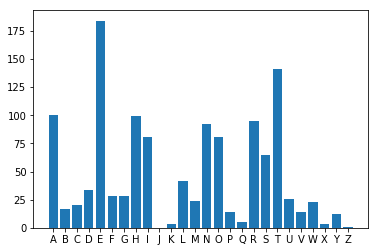

In [8]:
# using collections.Counter() to count of each element in string  
mgram = Counter(PT) 
mgram['J'] = 0  # enclude missing letter J
sorted_dict = {key: value for key, value in sorted(mgram.items())}

# plot the historgram of the letter frequency
plt.bar(range(len(sorted_dict)), sorted_dict.values(), align='center')
plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.show()

The graph above shows that in the test message, the letters E and T are the most frequent.  The primary weakness of a simple subsitution cipher is that the frequency of the letters are not altered and the letters A, E and T can be easily guessed.

In [9]:
print('the standard deviation for frequncy of letters is: {:.2f}'.format(np.std(np.array(list(mgram.values())))))

the standard deviation for frequncy of letters is: 47.04


Later we will see that the standard deviation of the letter frequency is much reduced after encryption.   

#### Chi-squared Statistic
The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies.  The two sets of frequencies we are looking at are the letter frequencies of the message and the letter frequencies in normal english.

A small chi square value means that letter frequencies of the message are strongly related to the letter frequencies in normal english.  A large chi square value means that the two frequencies are not well related.

The p value is a measure of the goodness of the statistics being compared.  Many fields of science use 0.05 as the  threshold of significance.  In the application described in this paper, where letter frequency distributions are bing compared, the proper p value might be something greater than 0.05, but since since we don't want to spend a lot of time researching this subject, we will just use the widely accepted value of 0.05 without justification.   

In cryptanalysis, the chi-squared test is used to compare the distribution of plaintext and (possibly) decrypted ciphertext. The lowest value of the test means that the decryption was successful with high probability.

In [10]:
f_obs = np.array(list(sorted_dict.values()))  # values from the mgram

In [11]:
# English single letter frequencies, in percent %
en_letter_freq = {'A':8.55, 'B':1.60, 'C':3.16, 'D':3.87, 'E':12.10, 'F':2.18, 'G':2.09, 'H':4.96,                
    'I':7.33, 'J':0.22, 'K':0.81, 'L':4.21, 'M':2.53, 'N':7.17, 'O':7.47, 'P':2.07,
    'Q':0.10, 'R':6.33, 'S':6.73, 'T':8.94, 'U':2.68, 'V':1.06, 'W':1.83, 'X':0.19, 'Y':1.72, 'Z':0.1 }

In [12]:
f_exp = np.array(list(en_letter_freq.values())) * np.array(list(sorted_dict.values())).sum()/100

In [13]:
chi_value, pvalue = chisquare(f_obs, f_exp=f_exp)
print('chisquare value: {:.2f}, p valaue: {:.3e}'.format(chi_value,pvalue))

chisquare value: 97.98, p valaue: 1.373e-10


Observation: Comparing the unencrypted test message letter frequencies to normal English letter frequencies, we get a chisquare value of 97.98 and a p value of less than 0.05.  So we can conclude that the test message is probably normal English and not encrypted or just jibbershish.  

#### Bigrams
Common two letter combinations are called bigrams.  The frequency distribution of bigrams for the english language is well known and can be used to help in the solution of simple substitution ciphers [13].

The code below counts the bigrams in the test message and displays a historgram of frequency.  

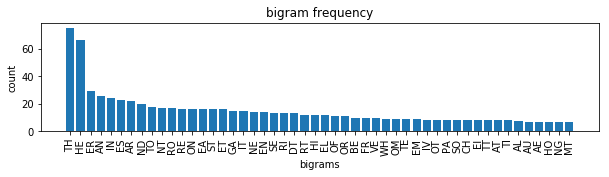

In [14]:
# count double characters, starting at beginning of text 
bigram = Counter(PT[idx : idx + 2] for idx in range(len(PT) - 1)) 

# count double characters, starting at 2nd letter of text 
bigram2 = Counter(PT[idx : idx + 2] for idx in range(1,len(PT) - 1)) 

bigram.update(bigram2) # combine groups
bigram = {k: v / 2 for k, v in bigram.items()} # divide values by 2
bigram_sorted = dict(sorted(bigram.items(), key=lambda item: item[1],reverse=True))

# slice out the first 50 fro plotting
bigram_sorted_sliced = dict(itertools.islice(bigram_sorted.items(), 50))

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)

plt.bar(range(len(bigram_sorted_sliced)), bigram_sorted_sliced.values(), align='center')
plt.xticks(range(len(bigram_sorted_sliced)), list(bigram_sorted_sliced.keys()))
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x')
plt.title('bigram frequency')
plt.ylabel('count')
plt.xlabel('bigrams')
plt.show()

The above graph shows that the most common letter pairs are TH and HE, which really stand out in the plot.

In [15]:
print('the standard deviation for frequncy of bigrams is: {:.2f}'.format(np.std(np.array(list(bigram.values())))))

the standard deviation for frequncy of bigrams is: 7.87


Observation: 

### 2.c) Character encoding for processing <a id="section2c"></a> 
In computers, letters and other symbols are encoded for electronic communication.  Historically, one of the first methods for encoding letters and numbers was Morse code.  Morse code was and still is used for sending messages over radio waves, but not as much on telegraph wires.  This type of encoding was used for the efficient transfer of information and not for encryption of the data.  

The test message is encoded as ASCII characters within the computer file [14].  The capital letter A is the decimal number 65, B is 66 and so on, all the way to Z, which is 90.  Thus the capital leters of the aplhabet are encoded as the numbers 65 to 90.  For processing, the code below subtracts 65 from the decimal representation to encode the characters as numbers that range from 0 to 25, thus A=0, B=1, ..., Z=25.        

The first step is to convert the text message from ASCII values to an array of numbers, where A=0, B=1, ..., Z=25.  The following line of python do that.  Additionally, the numbers in the array are of data type unit8, which means that all the numbers in the array are 8 bit unsigned intergers.  This is important to note since some of the mathmatic operations on the data will be automatically performed as unsigned 8 bit intergers.  

In [16]:
# map characters to numbers, A=0, B=1, ..., Z=25
PT_int = np.asarray(list(PT),dtype='|S1').view(np.uint8) - ord('A')
PT_int

array([ 0, 11, 11, ..., 17,  0,  1], dtype=uint8)

As can be seen above the first number in the message array is 0, which corresponds to the letter A and is the first letter in the message.  The next two numbers are 11 and 11, which corespond to the letter L, so the first word in the message is ALL when converted to an array of numbers.  

### 2.d) Key generation <a id="section2d"></a> 
The input key string can be any length using any characters.  The input key string is however striped of all non-letter characters and converted to upper case.  In this example, the names of common animals are used to make the password.  Only left 16 characters are used.  Additional comments about key length and choice of the letters used in the key will be provided in the cryptanalysis section below.  

The following code takes the key string and converts it to an all capital text string of length block size.

In [17]:
# generate subkeys from text string
key_string = 'elephantzebratigermonkeylion'
print('input key string: ',key_string)
print('input key string length = {:d}'.format(len(key_string)))
key_alpha_caps = ''.join(e for e in key_string if e.isalpha()).upper()[0:block_size]
print('key as alpha caps trimmed to block size: ',key_alpha_caps)

# only use the right most characters equal to block size
key = (np.asarray(list(key_alpha_caps),dtype='|S1').view(np.uint8) - ord('A'))[0:block_size]

input key string:  elephantzebratigermonkeylion
input key string length = 28
key as alpha caps trimmed to block size:  ELEPHANTZEBRATIG


### 2.e) Character XOR <a id="section2e"></a> 
One of the operations needed for the encryption algorithum is the Exclusive Or (XOR) function. This logic function normally operates on individual bits.  Bit wise XOR will return the same value if the operation is repeated twice and this property is is used in many encryption algoritums that operate on the message as collection of bits.

Since the characters in this project are encoded as numbers ranging from 0 to 25, modulo 26 addition is going to used as the character XOR function.  Since modulo addition does not have the property of returing the starting result when repeated twice, we need and inverse character XOR function.

The character XOR and the inverse function are described below.

In [18]:
# forward character XOR function
def char_xor(a,b):
    return (a + b) % 26  # add the two terms modulo 26 

The inverse character XOR function is based on subtraction and requires a bit of logic to acheive the correct modulo wrapping.

In [19]:
# inverse character XOR function
def inv_char_xor(a,b):
    r = np.ones(len(b),dtype=np.uint8)
    for i in range(len(b)):
        if a[i] >= b[i]:
            r[i] = a[i] - b[i]
        if a[i] < b[i]:
            r[i] = (a[i]+26) - b[i]
    return r

### 2.f) Mixer matrix <a id="section2f"></a> 
The Mixer is a matrix of 0 or 1 values and is used to expand operation of s-boxes across several characters in the message half-block.  Without the Mixer matrix, the S-box output character would be only depended on its corresponding input character and therefore there would exist a one to one correspondeance.  The one to one correspondance would make it easier to walk backwards throuh the encryption steps and recover the key from know cipher text and the known correspong plain text.  The ability to recover the key in this way is considered a weakness and discussed more in the cryptanalyssis section.  

The use of Mixer combines at least two other characters in the half-block with the main character using modulo 26 addition.  The mixed character is then used as the index to the S-box and the out put is corresponding value in the matrix.  Changing one character in the half-block causes multiple characters in the S-box output to change.  This cascade feature is a desirable feature for S-boxes. 

The Mixer matrix is not a part of the DES Fiestal function.  However, within the DES S-Box, 6 bits are used as inputs to each DES S-Box and the outer bits together with the four inner bits are as corrdinates into a look up table for the corresponding 4 bits of output.  The effect is that a group of bits is used to determine the output group of bits.  

Using this same idea, of a many to one relationship, the mixer matrix is implement as an identity matrix with a few other ones sprinked around the matrix, more or less at random.  When the matrix is multipled by the input vector, each value in the output will depend on the corresponding input as well as at least two other elements in the input vector.  In this way the out character is a mix of several input characters.    

This is the Mixer matrix:  
~~~
 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 0 0
 1 0 0 1 0 0 1 0
 1 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 1
 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 1
~~~
The diagomal elements are all ones and in each row, two other positions in the row are filled in with ones on a ramdom basis.  The non zero possitions in the column are the locations where the changes in the data propagate to other character positions.

Future work: generate Mixer matrix from block size.  See code in scratchpad.ipynb.  Same applies to S_box and P_table.

In [20]:
Mixer = np.array( \
    [[1, 1, 0, 0, 0, 0, 1, 0],
     [0, 1, 0, 1, 0, 0, 0, 1],
     [0, 0, 1, 1, 0, 1, 0, 0],
     [1, 0, 0, 1, 0, 0, 1, 0],
     [1, 0, 0, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 1, 1, 0, 1],
     [0, 1, 0, 0, 0, 1, 1, 0],
     [0, 0, 1, 0, 1, 0, 0, 1]],dtype=np.uint8)
#print(Mixer)    

### 2.g) S-box <a id="section2g"></a> 
The S-box is a matrix which is used to perform substitution.  The concept and use of a S-box is well known in block ciphers.  According to Wikipedia [15], the purpose of the S-box is to hide the relationship between the key and the ciphertext. The goal was to make the S-box act as a non-linear function, so that the output cannot be expressed as a linear equation, i.e. a straight line ($y = mx+b$).  There are two well known examples of S-boxes.  The first is used in the obsolet Data Encryption Standard (DES) [16] and the second is used in the Advanced Data Encryption Standard (AES) [17].  The S-box implement here loosly follows the DES S-box.

In the code below, S0, S1, ... S7 are arrays that constist of the numbers 0 to 26 in different random orders. S0, S1, ... S7 are combined into a matrix for processing within a For loop.   The input data is used as index to S0, for example, and the value returned is some new value.   The matrix of S0, S1, ... S7 is the two dimentional array called s_box.  

In the DES S-Box, the substitution is dependent on the data and across several bits.  The expansion in the half block also spreads the bits out and duplicates some.  

In [21]:
# generator code
s = np.arange(0,26)
np.random.shuffle(s)
s

array([25, 24,  6, 21, 22, 12,  7, 19, 11, 14, 13,  5,  9, 18,  4, 15, 10,
       20,  0, 17, 16,  1,  2, 23,  3,  8])

The generator code is run a number of times to make up the values for the arrays.  These values are copied by hand into the arrays below one time and hard coded.  There is nothing special about the order of numbers in the array, they are just random.  

In [22]:
S0 = np.array([17,  5,  2, 24, 15, 10, 21,  0, 25, 19,  1, 20, 13,  8,  7, 16, 23,
        6,  4, 22,  9, 18, 11, 12, 14,  3],dtype=np.uint8)
S1 = np.array([22,  3, 10, 17, 23, 20,  5, 15, 18,  7, 16, 11, 21,  6,  9,  4, 12,
       25, 13, 19,  8,  2,  1,  0, 24, 14],dtype=np.uint8)
S2 = np.array([19, 11, 24, 21, 18,  8, 14, 16,  9, 12,  7, 22, 17,  3,  4, 15,  5,
       25, 10, 23, 20,  2,  1, 13,  6,  0],dtype=np.uint8)
S3 = np.array([ 1, 23, 13,  0, 10, 20, 25, 18,  2,  6, 14, 19,  5, 24, 16, 17,  8,
        4, 22, 15,  3, 12, 11,  9, 21,  7],dtype=np.uint8)
S4 = np.array([25, 19, 17,  2,  8, 10, 15, 16, 13,  6,  0, 24,  9,  4, 20,  7, 18,
       11,  1, 12, 22, 23, 14, 21,  5,  3],dtype=np.uint8)
S5 = np.array([ 9, 12,  6,  3, 23, 11, 20, 10, 13, 16,  4, 25,  5, 19,  0, 21,  2,
       24, 22,  7, 15,  8, 18,  1, 14, 17],dtype=np.uint8)
S6 = np.array([21, 10, 22, 25,  3,  7, 15,  0, 24, 14,  1, 13,  6, 17, 11,  2,  4,
       16,  5, 23,  8, 20, 19,  9, 18, 12],dtype=np.uint8)
S7 = np.array([16, 23,  4,  9,  7,  8, 18, 11, 22, 24,  6, 15, 13,  2, 12,  3, 14,
       10, 17,  5, 25, 21, 20, 19,  1,  0],dtype=np.uint8)

In [23]:
# assemble the individual S-boxes into an m by n array, where m is the size of the alphabet and n is block_size/2
S_box = np.array([S0,S1,S2,S3,S4,S5,S6,S7])
print(S_box)

[[17  5  2 24 15 10 21  0 25 19  1 20 13  8  7 16 23  6  4 22  9 18 11 12
  14  3]
 [22  3 10 17 23 20  5 15 18  7 16 11 21  6  9  4 12 25 13 19  8  2  1  0
  24 14]
 [19 11 24 21 18  8 14 16  9 12  7 22 17  3  4 15  5 25 10 23 20  2  1 13
   6  0]
 [ 1 23 13  0 10 20 25 18  2  6 14 19  5 24 16 17  8  4 22 15  3 12 11  9
  21  7]
 [25 19 17  2  8 10 15 16 13  6  0 24  9  4 20  7 18 11  1 12 22 23 14 21
   5  3]
 [ 9 12  6  3 23 11 20 10 13 16  4 25  5 19  0 21  2 24 22  7 15  8 18  1
  14 17]
 [21 10 22 25  3  7 15  0 24 14  1 13  6 17 11  2  4 16  5 23  8 20 19  9
  18 12]
 [16 23  4  9  7  8 18 11 22 24  6 15 13  2 12  3 14 10 17  5 25 21 20 19
   1  0]]


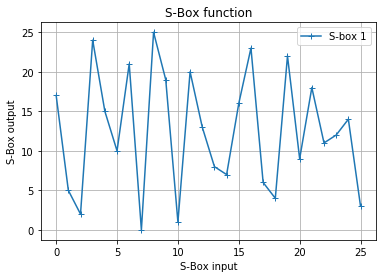

In [24]:
# plot one of the S-boxes
plt.plot(S_box[0],'+-',label='S-box 1')
plt.title('S-Box function')
plt.xlabel('S-Box input')
plt.ylabel('S-Box output')
plt.legend(loc='upper right')
plt.grid()
plt.show()

Observation: 

### 2.h) P-table <a id="section2h"></a> 
The P-table is used to shuffle the characters of the half-block so that bigram relationships are altered.  The table is implemented as an array of values from 0 to 7 in a random order.  The P-table permutes the order of the output so that adjacent characters in the input message are no longer adjacent.  This thwarts bigram frequency analysis of the cipher text.  

The design of the P-table should be to produce a random shuffeling and seperate adjacent characters.

After two rounds are 1 and 7 back to orginal place?  Explore this in the algorithm section <<<<====     

In [25]:
# generator code
i = np.arange(0,block_size/2,dtype=np.uint8)
np.random.shuffle(i)
print(i)

[4 3 2 0 7 6 5 1]


In [26]:
# run the generator code above and copy the result to the P_table array once.
P_table = np.array([7, 2, 6, 5, 0, 4, 3, 1],dtype=np.uint8)
print(P_table)

[7 2 6 5 0 4 3 1]


### 2.i) Feistel function <a id="section2i"></a> 
The Feistel function, also called a round function, as implemented in this project will losely follow the DES implementation.  Within a Feistel network, the function can be almost any function. A simple pass through function or a one way hash function could be used.  Since we are not going to design a new function from scratch, we will just follow the DES Feistel function with some modifications.  The use of the Mixer matrix is new and the implementation of S-box and the P-table are different.  

<img src='Feistel function.jpg' width="300"/>   
Figure 4: Block diagram of the Feistel function, FF()    
     
The FF() function, shown in Figure 4, operates on half a block and consists of four stages:  
- Key mixing: the half block is combined with a subkey using the character XOR operation.
- Mixing: after mixing in the subkey, the Mixer matrix and the half block XOR subkey product are multiplied together with a dot multiplation matrix operation.  Each element of the resulting vector is product and summation of several other characters from the input vector.   
- Substitution: after mixing, the block is processing by the S-boxes, or substitution boxes. Each element in the vector is replaced by a different characters according to the look up table.
- Permutation: finally, the character order of the half block is rearranged according to a fixed permutation table.

The following code implements the Feistel function

In [27]:
# Feistel function, FF()
def FF(a,k):
    # xor data with the subkey and reshape for matrix multiplication
    xor_out = np.reshape(char_xor(a,k), (-1, 1))
    # use the mixer matrix to make each element of s dependent on several other elements in the block
    s = (np.asarray(Mixer @ xor_out) % 26).reshape(-1)  # @ is the matrix dot operator

    # run each element of s through the S_box matrix as an index and replace with new value
    for i in range(int(block_size/2)):
        s[i] = S_box[i][s[i]]

    # permutate the element order of S according to P
    f = np.ones(int(block_size/2),dtype=np.uint8)
    for i in range(len(f)):
        f[i] = s[P_table[i]]
    return f

## 3) Design <a id="section3"></a>
The following functions implement encryption and decryption operations using the Feistel network with a modified DES Feistel function.  Encrypting one block at a time, where the blocks are encrypted independently of each other, is called Electronic codebook (ECB).  ECB encrypts identical plaintext blocks into identical ciphertext blocks and therefore this mode does not hide repeating patterns in the data.

Cipher block chaining (CBC) is a mode that XORs each block of plaintext with the previous block of ciphertext before being encrypted. The CBC mode hides repeating data in the message.  When encrypting data using CBC, an initialization vector can be used at first block in the encryption process.

There are other modes of operation for block ciphers [18], but these will not be addressed in this project.  

Add some commenst about why functions were constructed this way.  <<<<=====

In [28]:
# encrypt function, one block
def encrypt(a,k):
    '''
    a is a block of data to be encrypted and is of block size
    k is the full key of length block size
    '''
    # divide data into half blocks
    left_0 = a[0:int(block_size/2)]  # left side of the block
    right_0 = a[int(block_size/2):int(block_size)]  # right side of the block
    
    # extract sub keys
    k0 = k[0:int(block_size/2)]
    k1 = k[int(block_size/2):int(block_size)]
   
    # round 0
    right_1 = char_xor(left_0,FF(right_0,k0))
    left_1 = right_0

    #round 1
    right_2 = char_xor(left_1,FF(right_1,k1))
    left_2 = right_1

    return np.append(left_2,right_2)

In [29]:
# decrypt function, one block
def decrypt(a,k):
    '''
    a is a block of data to be decrypted and is of block size
    k is the full key of length block siz
    '''
    # divide data into half blocks
    left_2 = a[0:int(block_size/2)]
    right_2 = a[int(block_size/2):int(block_size)]
    
    # extract sub keys
    k0 = k[0:int(block_size/2)]
    k1 = k[int(block_size/2):int(block_size)]    
    
    # round 1
    left_1 = inv_char_xor(right_2,FF(left_2,k1))
    right_1 = left_2

    # round 0
    left_0 = inv_char_xor(right_1,FF(left_1,k0))
    right_0 = left_1
    
    return np.append(left_0,right_0)

In [30]:
def encrypt_ECB(pt_msg, k):
    '''
    pt_msg: plain text message as an uint8 array
    k: full key of length block size as an uint8 array
    returns: cipher text as an uint8 array
    '''    
    # split the plain text message into an array of message blocks 
    msg_blocks = np.array_split(pt_msg, len(pt_msg)/block_size)

    # encrypt each block and append to the list
    ct = []  # make an empty list
    for i in msg_blocks:
        ct = np.append(ct,encrypt(i,k)).astype(np.uint8)
        
    return ct

In [31]:
def decrypt_ECB(ct_msg, k):
    '''
    ct_msg: cipher text message as an uint8 array
    k: full key of length block size as an uint8 array
    returns: cipher text as an uint8 array
    ''' 
    msg_blocks = np.array_split(ct_msg, len(ct_msg)/block_size)

    pt = []
    for i in msg_blocks:
        pt = np.append(pt,decrypt(i,k)).astype(np.uint8)
    
    return pt

In [32]:
# make a function
def encrypt_CBC(pt_msg,k):
    '''
    pt_msg: plain text message as an uint8 array
    k: full key of length block size as an uint8 array
    returns: cipher text as an uint8 array
    '''
    pt_msg_blocks = np.array_split(pt_msg, len(pt_msg)/block_size)

    ct_msg = []
    last_ct_block = np.zeros(block_size,dtype=np.uint8) # to start, initialize as zeros 

    for i in pt_msg_blocks:
        p = char_xor(i,last_ct_block).astype(np.uint8)  # xor current block with previous block of CT
        current_block_ct = encrypt(p,k).astype(np.uint8)
        last_ct_block = current_block_ct  # save for next time through the loop
        ct_msg = np.append(ct_msg,current_block_ct).astype(np.uint8)
        
    return ct_msg

In [33]:
# make a function
def decrypt_CBC(ct_msg,k):
    '''
    pt_msg: plain text message as an uint8 array
    k: full key of length block size as an uint8 array
    returns: plain text as an uint8 array
    '''
    ct_msg_blocks = np.array_split(ct_msg, len(ct_msg)/block_size)

    pt = []
    last_ct_block = np.zeros(block_size,dtype=np.uint8) # to start, initialize as zeros 

    for i in ct_msg_blocks:
        #p = char_xor(i,last_ct_block).astype(np.uint8)  # xor current block with previous block of CT
        #current_block_ct = decrypt(p,key).astype(np.uint8)

        p = decrypt(i,k).astype(np.uint8)    
        current_block_pt = inv_char_xor(p,last_ct_block).astype(np.uint8)  # xor current block with previous block of CT    

        last_ct_block = i  # save for next time through the loop
        pt = np.append(pt,current_block_pt).astype(np.uint8)
        
    return pt

## 4) Test message <a id="section4"></a>
The following code encrypts and decrypts the test message, first using the Electronic codebook (ECB) mode, then using the Cipher block chaining (CBC) is a mode.  

### Encrypt test message with Electronic codebook (ECB) mode

In [34]:
# display the cipher text as ascii characters
ct_ECB = encrypt_ECB(PT_int, key)
ct_ECB_ascii = (ct_ECB+ord('A')).tostring().decode('ascii') # convert back to ascii characters

string = ct_ECB_ascii
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

TLJGFRUQHCSUBZIVOLQCMBIZAHMQXTZTRAYRGNBKOKBHCTYKOHNKBHAMEWBHLBTQLJVGSRFNPMU
PPVHNRMULCONECGBUQWLQDHIGGHUVOZCOTMBSQNHUFSEETMWBXRJOOVTFEFWYLICYAMDTPJAYQD
ADSYEBAQKTLIVEPBQAOYXNCKMYUOMWPWXEUTXISBKKLVWPGRQZLDRITSIJJCKMUWARVJLNSOPVB
MEXRVQOSCWIUOFLAOHIGQPGUXWBHZMKVCWDQQJPIMWTHMFIOFFRGTXDCXNQYAFXNRBIQYDYNRNA
VTGCULZKZPOAMFEXNMZFHNMZJEPRKKBPCRTZEHXAYWUEAGJBKECZYNBTZHHYWWDXPECIQZPLOXF
QCNGLRKXWQSJXSQMCKGGUXQULFFMWBDJWHIXDPOFGFDIKIJAPFVJSEREJUMDUJCIXRAYOIJHJOO
TNHACEBHHHQSAYYPYALBGVTUOUGHFEHWQBGFZAVQUWEPIBULXOEJQZYLVGZISWEDUPVKTYNEGNY
GOQJAQKPEBKUAMEOFCKSAROKPQBUPJTDGHMPUXFGNVRIOEJYAYKNXJUBTDZGJZAFJUSJJDXBSRP
BNRXEVXPIXTHKOBPONJJTKMQZDGBLPSSAQPQSGILPBDLNAFFCBNRONEFEOPEDOGTVSKXXKWZBCD
ZXPHEGMLOZICWCDSMQBDNXTXLAOFILEIQBEKGYVFEHFCDVMXPJCVAHRZRBOEBLKZASDLWNISJKE
HLQFSAAZUFZZDHEHCTUKSNUZOJKPQXQZRRWZFUUONOHZZJAFFFGLWMHVECRVKYZYUDTEXTNFNKL
IXPWKKQQDGYVLONBTRKRQFXYVGCPFXITJPTJDQWECRQULYEIAXUUJMLKFHQFVFIAZSCDLOLXPTJ
VLXGLLPGNDBKXAXZGBPBWNBOXWKWBLDVVPECPXWUJHMOBXWXDCWGESOGRPOWGXGOEXWBEMLFINX
KTWHUBYIKSLS

### Decrypt test message with Electronic codebook (ECB) mode

In [35]:
pt_ECB = decrypt_ECB(ct_ECB, key)

pt_ECB_recvd_ascii = (pt_ECB+ord('A')).tostring().decode('ascii')

string = pt_ECB_recvd_ascii
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

ALLGAULISDIVIDEDINTOTHREEPARTSONEOFWHICHTHEBELGAEINHABITTHEAQUITANIANOTHERT
HOSEWHOINTHEIROWNLANGUAGEARECALLEDCELTSINOURGAULSTHETHIRDALLTHESEDIFFERFROM
EACHOTHERINLANGUAGECUSTOMSANDLAWSTHERIVERGARONNESEPARATESTHEGAULSFROMTHEAQU
ITANITHEMARNEANDTHESEINESEPARATETHEMFROMTHEBELGAEOFALLTHESETHEBELGAEARETHEB
RAVESTBECAUSETHEYAREFURTHESTFROMTHECIVILIZATIONANDREFINEMENTOFOURPROVINCEAN
DMERCHANTSLEASTFREQUENTLYRESORTTOTHEMANDIMPORTTHOSETHINGSWHICHTENDTOEFFEMIN
ATETHEMINDANDTHEYARETHENEARESTTOTHEGERMANSWHODWELLBEYONDTHERHINEWITHWHOMTHE
YARECONTINUALLYWAGINGWARFORWHICHREASONTHEHELVETIIALSOSURPASSTHERESTOFTHEGAU
LSINVALORASTHEYCONTENDWITHTHEGERMANSINALMOSTDAILYBATTLESWHENTHEYEITHERREPEL
THEMFROMTHEIROWNTERRITORIESORTHEMSELVESWAGEWARONTHEIRFRONTIERSONEPARTOFTHES
EWHICHITHASBEENSAIDTHATTHEGAULSOCCUPYTAKESITSBEGINNINGATTHERIVERRHONEITISBO
UNDEDBYTHERIVERGARONNETHEOCEANANDTHETERRITORIESOFTHEBELGAEITBORDERSTOOONTHE
SIDEOFTHESEQUANIANDTHEHELVETIIUPONTHERIVERRHINEANDSTRETCHESTOWARDTHENORTHTH
EBELGAERISES

### Encrypt test message with Cipher block chaining (CBC) mode

In [36]:
ct_CBC_int = encrypt_CBC(PT_int,key)

# convert back to ascii characters and display
ct_CBC_ascii = (ct_CBC_int+ord('A')).tostring().decode('ascii')

string = ct_CBC_ascii
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

TLJGFRUQHCSUBZIVCBYBPQGLTKOGDEORFFVQZXXKBOVSLPCWOKOOECSFBKNWGXGMBWOMVHGGZLR
NBUOMDDBNSFTEXRCJNZTUKXZJGVVMYGSSYICYGREXPSPAOSCEDCOVUHECCJNTNPSLJELRYUMUGB
OGXGRJWCMBEHUVFGNOAWSPIMMSQJNESSDQLUXOLHPVWOCUDXSYGMMPMRGDPMUEHNOLCBDFKNADI
GJBMYJFRKIWWPIWIABDETUUNLRNEQINCRKDEVCXQBVZAXNGMYQFWSWIULDLZGKCBTGLNZBDWDZM
LNYYOKADXCOKMBNDVVPAOAESTCANBEBZRJDHHFFPNKCIUHHWHPFCOWTPDCQMLOSSSSAOOIAFWUR
KZZBLNCPFKZCTXORXMJJZUNWPXCLFZHWKCZOGPLKKPNBXIIDJUCGBUYOKQWUNCUIAGMTNJAYMZH
JSWYGWOBKLVPNGPHIPVJPCFNPWXAJNLADYXUVJFBKFZVKIXYVUOOQLPIDROJLNEWSFIHIWMJACO
XCCGJPQYDWQSRCCVXQWGROVOEGGREZFJYOPZYRPBTQWXGJTFQBQRFKALVJMBEBVTVOWUSOOIOQV
NHTKWKKUIGTVNXLOYVJPKCLOLJJWVJRNLVHJDQWSHSVZYZDBGOTDEXSDLUPPXXNEDNALGSCQGGH
KEZPDPMYPAWKPDZVRHWMMDXVXHZIXENHWBLNRZPVDDOXALFEFQHSNQRXGSKAPAZMZALGMMMKFTJ
EWLGSFUQWFFTXJUASDBJLQEUXUZHYSQMZNHSSOBAZHSZJDNBDJYTALARVORTSVDVHJFAUYVZRAZ
LZFHSEVCXRIUVACETZVVBKGARBMWWLLUQRIHZABGJDBGRHHBJQSLCJZQCZTWTZPOOTNGNWYPNZA
AQPBNMVWMPNSVVOEYOWCPPDTJOGVKQXIAXDNDJFEUSMXXAOBVTJQMKYJHCYDXEHUNTVQJGYKORT
LHDXARUJZAID

### Decrypt test message with Cipher block chaining (CBC) mode

In [37]:
pt_CBC_int = decrypt_CBC(ct_CBC_int,key)

# convert back to ascii characters and display
pt_CBC_ascii = (pt_CBC_int+ord('A')).tostring().decode('ascii')

string = pt_CBC_ascii
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

ALLGAULISDIVIDEDINTOTHREEPARTSONEOFWHICHTHEBELGAEINHABITTHEAQUITANIANOTHERT
HOSEWHOINTHEIROWNLANGUAGEARECALLEDCELTSINOURGAULSTHETHIRDALLTHESEDIFFERFROM
EACHOTHERINLANGUAGECUSTOMSANDLAWSTHERIVERGARONNESEPARATESTHEGAULSFROMTHEAQU
ITANITHEMARNEANDTHESEINESEPARATETHEMFROMTHEBELGAEOFALLTHESETHEBELGAEARETHEB
RAVESTBECAUSETHEYAREFURTHESTFROMTHECIVILIZATIONANDREFINEMENTOFOURPROVINCEAN
DMERCHANTSLEASTFREQUENTLYRESORTTOTHEMANDIMPORTTHOSETHINGSWHICHTENDTOEFFEMIN
ATETHEMINDANDTHEYARETHENEARESTTOTHEGERMANSWHODWELLBEYONDTHERHINEWITHWHOMTHE
YARECONTINUALLYWAGINGWARFORWHICHREASONTHEHELVETIIALSOSURPASSTHERESTOFTHEGAU
LSINVALORASTHEYCONTENDWITHTHEGERMANSINALMOSTDAILYBATTLESWHENTHEYEITHERREPEL
THEMFROMTHEIROWNTERRITORIESORTHEMSELVESWAGEWARONTHEIRFRONTIERSONEPARTOFTHES
EWHICHITHASBEENSAIDTHATTHEGAULSOCCUPYTAKESITSBEGINNINGATTHERIVERRHONEITISBO
UNDEDBYTHERIVERGARONNETHEOCEANANDTHETERRITORIESOFTHEBELGAEITBORDERSTOOONTHE
SIDEOFTHESEQUANIANDTHEHELVETIIUPONTHERIVERRHINEANDSTRETCHESTOWARDTHENORTHTH
EBELGAERISES

## 5) Algorithm analysis <a id="section5"></a>
This section has been moved to a new notebook since it was getting too long.

## 6) Ciphertext attack <a id="section6"></a> 
Moved to a new notebook.

## 7) Plaintext attack <a id="section7"></a>
Moved to a new notebook.  

In [38]:
# Saving some of the objects to use in the cryptanalysis notebook
with open('objs.pkl', 'wb') as f:
    pickle.dump([block_size,PT,PT_int,key,Mixer,S_box,P_table,en_letter_freq], f)

## 8) Conclusion <a id="section9"></a>
This paper described the design and analysis of a block cipher that encrypts a message composed of English letters based on a modified DES.  

We looked at the properites and security aspects of the algorithm.

What did we find.  
- flattens letter frequency, bigram frequency changed
- key space
- nonlinear
- sensitivity to key errors
- block size 
- CT attack showned what
- PT attack showed what can key be revovered?  


Other topics:  
Other variations, encrypt numbers like social security numbers, phone numbers, pad lock combinations, credit-card numbers etc.  The alphebet would consist of only the digits 0 through 9.   

what is the morse code character set?   A-Z + 0-9  Could variable length characters be used?   
Prosigns for Morse code, could these also be used in the PT?     

xxxx xxxx xxxx xxxx


re-write code to make block size variable.   

Can a pencil and paper by-hand angorithum be devised?   

Hardware implementation:   
Rpi0+usb keyboard+small display, running off line. can also be a PW manager, 


Development of a cipher that only uses a 56 bit key.   
In 1996, thirty-nine countries signed the Wassenaar Arrangement, an arms control treaty that deals with the export of arms and "dual-use" technologies such as cryptography. The treaty stipulated that the use of cryptography with short key-lengths (56-bit for symmetric encryption, 512-bit for RSA) would no longer be export-controlled.[64]

Cryptography exports from the US became less strictly regulated as a consequence of a major relaxation in 2000;[65] there are no longer very many restrictions on key sizes in US-exported mass-market software. 




## 9) References <a id="section9"></a>
1. Wikipedia contributors. (2021, January 11). Encryption. In Wikipedia, The Free Encyclopedia. Retrieved 17:22, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Encryption
2. David Oranchak, "Let's Crack Zodiac-Episode 5 - The 340 Is Solved!", Dec 11, 2020, https://www.youtube.com/watch?v=-1oQLPRE21o&t=283s
3. David Oranchak, "Let's Crack Zodiac-Episode 3 - The 408", Sep 1, 2020, https://www.youtube.com/watch?v=57o8g3d6lSw
4. Wikipedia contributors. (2020, December 17). Playfair cipher. In Wikipedia, The Free Encyclopedia. Retrieved 01:46, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Playfair_cipher
5. Wikipedia contributors. (2021, January 7). Enigma machine. In Wikipedia, The Free Encyclopedia. Retrieved 14:51, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Enigma_machine
6. Wikipedia contributors. (2021, January 8). Feistel cipher. In Wikipedia, The Free Encyclopedia. Retrieved 14:52, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Feistel_cipher
7. Wikipedia contributors. (2020, December 25). Data Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 15:02, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Data_Encryption_Standard
8. Wikipedia contributors. (2021, January 5). Block cipher. In Wikipedia, The Free Encyclopedia. Retrieved 15:04, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Block_cipher
9. Wikipedia contributors. (2021, January 8). Gallic Wars. In Wikipedia, The Free Encyclopedia. Retrieved 02:10, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Gallic_Wars
10. Wikipedia contributors. (2021, January 8). Commentarii de Bello Gallico. In Wikipedia, The Free Encyclopedia. Retrieved 02:11, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Commentarii_de_Bello_Gallico
11. Wikipedia contributors. (2021, January 4). Kryptos. In Wikipedia, The Free Encyclopedia. Retrieved 15:15, January 15, 2021, from https://en.wikipedia.org/w/index.php?title=Kryptos
12. Wikipedia contributors. (2020, December 18). Caesar cipher. In Wikipedia, The Free Encyclopedia. Retrieved 02:11, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Caesar_cipher
13. Wikipedia contributors. (2020, December 13). Bigram. In Wikipedia, The Free Encyclopedia. Retrieved 02:42, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Bigram
14. Wikipedia contributors. (2021, January 4). ASCII. In Wikipedia, The Free Encyclopedia. Retrieved 13:52, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=ASCII&oldid=998308027
15. Wikipedia contributors. (2021, January 7). S-box. In Wikipedia, The Free Encyclopedia. Retrieved 14:32, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=S-box&oldid=998908798  
16. Wikipedia contributors. (2020, December 25). Data Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 14:30, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=Data_Encryption_Standard&oldid=996197167  
17. Wikipedia contributors. (2021, January 7). Advanced Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 14:31, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=Advanced_Encryption_Standard&oldid=998858677
18. Wikipedia contributors. (2021, January 4). Block cipher mode of operation. In Wikipedia, The Free Encyclopedia. Retrieved 13:41, January 14, 2021, from https://en.wikipedia.org/w/index.php?title=Block_cipher_mode_of_operation&oldid=998138792

